## Exercise 2 - The Conjugate Gradient algorithm

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'
```

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

In the following $A$ is a symmetric, positive-definite matrix and $f$ is the usual quadratic function $f(x)=\frac{1}{2} x^T A x-b^T x$. Recall that the solution of this problem is the solution of the system $A x=b$.

**Question 1**

Implement the Gram-Schmidt algorithm which can produce a basis of $A$-orthogonal vectors starting from a basis of $\mathbb{R}^n$. Using this basis of $A$-orthogonal vectors compute the inverse of $A$, as shown in the course.
</div>

In [12]:
import scipy.optimize as scopt
import numpy as np
import pylab as pl
from ipywidgets import *
import matplotlib.pyplot as plt
import sympy as sp

In [23]:
def gramschmidt(A):
    """
    Applies the Gram-Schmidt method to A
    and returns Q and R, so Q*R = A.
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            q = Q[:, i]
            R[i, j] = np.dot(q, v)
            v = v - R[i, j]*q
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v/R[j, j]
    return Q, R

In [39]:
A = np.array([[0, 1, 1], [3, 0, 1], [4, 1, 3]])
Q, R = gramschmidt(A)
print("Q = \n", Q)
print('-'*50)
print('The orthonormal basis of A is:')
print('q1 = ', Q[:, 0])
print('q2 = ', Q[:, 1])
print('q3 = ', Q[:, 2])
print('-'*50)
print("R = \n", R)
print('-'*50)
print('The QR decomposition of A is:', np.dot(Q, R))

Q = 
 [[ 0.          0.85749293 -0.51449576]
 [ 0.6        -0.4115966  -0.68599434]
 [ 0.8         0.30869745  0.51449576]]
--------------------------------------------------
The orthonormal basis of A is:
q1 =  [0.  0.6 0.8]
q2 =  [ 0.85749293 -0.4115966   0.30869745]
q3 =  [-0.51449576 -0.68599434  0.51449576]
--------------------------------------------------
R = 
 [[5.         0.8        3.        ]
 [0.         1.16619038 1.37198868]
 [0.         0.         0.34299717]]
--------------------------------------------------
The QR decomposition of A is: [[0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.00000000e+00 1.90030637e-17 1.00000000e+00]
 [4.00000000e+00 1.00000000e+00 3.00000000e+00]]


In [40]:
# compute the inverse of A with the method of Gram-Schmidt
def inverse(A):
    Q, R = gramschmidt(A)
    m, n = A.shape
    I = np.eye(m)
    inv = np.zeros((m, n))
    for i in range(m):
        b = I[:, i]
        x = np.linalg.solve(R, np.dot(Q.T, b))
        inv[:, i] = x
    return inv

In [42]:
inversed_A = inverse(A)
print('The inverse of A is:\n', inversed_A)
print('-'*50)
print('The inverse of A is with computation of numpy package:\n', np.linalg.inv(A))

The inverse of A is:
 [[ 0.5  1.  -0.5]
 [ 2.5  2.  -1.5]
 [-1.5 -2.   1.5]]
--------------------------------------------------
The inverse of A is with computation of numpy package:
 [[ 0.5  1.  -0.5]
 [ 2.5  2.  -1.5]
 [-1.5 -2.   1.5]]


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2**

Implement the Conjugated Gradient (CG) algorithm (see Course \#5) which computes the next conjugate direction at each iteration. Test numerically the following claims:
- The CG algorithm converges in $n$ iterations.
- If $A$ has only $k<n$ distinct eigenvalues then the CG algorithm converges in $k$ iterations.

**Note:** In order to generate interesting test-cases recall that any orthogonal matrix $U$ and diagonal matrix $D$ with positive entries generates a symmetric positive definite matrix
$$
A=U D U^T
$$
You may define an arbitrary diagonal matrix $D$ starting from a vector with positive entries using the command **numpy.diag**. You can find general orthonormal matrices $U$ starting from an arbitrary basis of $\mathbb{R}^n$ with the command **scipy.linalg.orth**. For example, you may consider the following code:
```python
N = 100
M = np.random.rand(N,N)
U = scipy.linalg.orth(M)
D = numpy.diag(numpy.random.rand(N))
A = U@D@U.T
```
which will generate a symmetric positive matrix $A$ of size $100 \times 100$. Moreover, in order to test the convergence of $\mathrm{CG}$ in terms of the number of distinct eigenvalues you may manually set some of the values in $D$ to be equal to the same common value in order to obtain eigenvalues with the multiplicity that you want. **Do not choose $N$ too big. Recall that a $10000 \times 10000$ matrix already occupies $800 \mathbf{M b}$ of RAM memory and a $40000 \times 40000$ matrix will occupy almost 13 Gb of RAM**.
</div>

In [76]:
def conjugate_gradient(A, b, x0, tol=1e-15, max_iter=2000):
    n = len(b)
    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    if max_iter is None:
        max_iter = n
    for _ in range(max_iter):
        Ap = A @ p
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        if np.linalg.norm(r_new) < tol:
            break
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
    return x


In [74]:
import scipy.linalg

np.random.seed(0)
N = 5
M = np.random.rand(N,N)
U = scipy.linalg.orth(M)
D = np.diag([1, 1, 2, 2, 2]) # two distinct eigenvalues
A = U @ D @ U.T
b = np.random.rand(N)
x0 = np.zeros(N)
print('A = \n', A)
print('-'*50)
print('b = \n', b)
print('-'*50)

# solve Ax = b with conjugate gradient method
x = conjugate_gradient(A, b, x0)
print('The solution of Ax = b with conjugate gradient method is:\n', x)
print('-'*50)
print('The solution of Ax = b with numpy package is:\n', np.linalg.solve(A, b))

A = 
 [[ 1.83267921 -0.19982955 -0.19914303 -0.10888825 -0.21881064]
 [-0.19982955  1.72058181 -0.19667949 -0.30329169 -0.17533724]
 [-0.19914303 -0.19667949  1.72143244  0.04531322 -0.34723712]
 [-0.10888825 -0.30329169  0.04531322  1.19282929  0.2230479 ]
 [-0.21881064 -0.17533724 -0.34723712  0.2230479   1.53247725]]
--------------------------------------------------
b = 
 [0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
--------------------------------------------------
The solution of Ax = b with conjugate gradient method is:
 [0.55565958 0.36402943 0.74189644 0.46046564 0.49265473]
--------------------------------------------------
The solution of Ax = b with numpy package is:
 [0.55565958 0.36402943 0.74189644 0.46046564 0.49265473]


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 3**

For a moderate size problem (e.g. $n=1000$ ) compute the condition number $Q$ of the matrix $A$ and compute the following quantities
- the error with respect to the objective function
$$
E\left(x_i\right)=\frac{1}{2}\left(x_i-x^*\right)^T A\left(x_i-x^*\right)
$$
- the error estimate
$$
4\left(\frac{\sqrt{Q}-1}{\sqrt{Q}+1}\right)^{2 i}
$$
and store them in two vectors. Run the full $n$ iterations of the CG algorithm.
Plot the two quantities at the end of the optimization algorithm in order to have a comparison between the actual error and the error estimate. Decide where you could have stopped the optimization process with acceptable results.
</div>

In [77]:
# compute the condition number of A
def condition_number(A):
    return np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A))

def conjugate_gradient_error(A, b, x0, tol=1e-10, max_iter=2000):
    n = len(b)
    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    num_iter = 0
    x_star = np.linalg.solve(A, b)
    error = []
    error_estimates = []
    for i in range(max_iter):
        error.append(1/2 * (x - x_star).T @ A @ (x - x_star))
        error_estimates.append(4 * (np.sqrt(condition_number(A)) - 1) / (np.sqrt(condition_number(A)) + 1) ** (2 * i))
        Ap = A @ p
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        if np.linalg.norm(r_new) < tol:
            break
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
        num_iter += 1
    return x, error, error_estimates, num_iter

In [82]:
np.random.seed(0)
N = 1000
M = np.random.rand(N, N)
U = scipy.linalg.orth(M)
D = np.diag(np.random.rand(N))
A = U@D@U.T
b = np.random.rand(N)
x0 = np.zeros(N)
x, error, error_estimates, num_iter = conjugate_gradient_error(A, b, x0)

<ipython-input-77-466072c2e80b>:16: RuntimeWarning: overflow encountered in scalar power
  error_estimates.append(4 * (np.sqrt(condition_number(A)) - 1) / (np.sqrt(condition_number(A)) + 1) ** (2 * i))


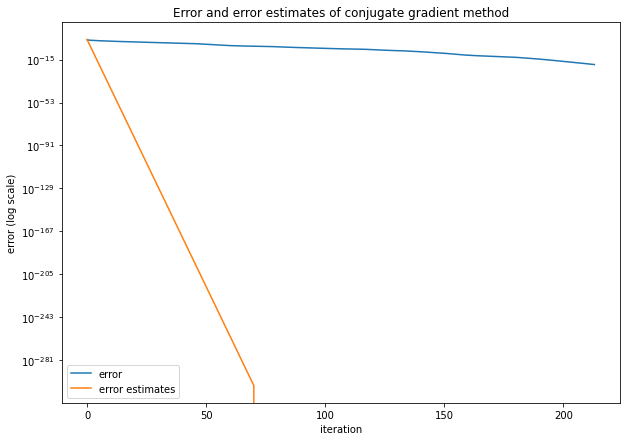

In [88]:
# plot the graph of error and error estimates, error in log scale
plt.figure(figsize=(10, 7))
plt.plot(error, label='error')
plt.plot(error_estimates, label='error estimates')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('error (log scale)')
plt.title('Error and error estimates of conjugate gradient method')
plt.legend()
plt.show()